In [1]:
print('ritu')

ritu


In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import cross_val_score

In [3]:
df = pd.read_csv('iris/iris.csv')
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [4]:
X = df.iloc[:,:4]
y = df.iloc[:,4]
display(X)
display(y)

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


0         Setosa
1         Setosa
2         Setosa
3         Setosa
4         Setosa
         ...    
145    Virginica
146    Virginica
147    Virginica
148    Virginica
149    Virginica
Name: variety, Length: 150, dtype: object

# Exhaustive Feature Selector/ Best Feature Selector

In [5]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
lr = LogisticRegression()
efs = EFS(lr,max_features = 4,scoring = 'accuracy',cv=5)
model = efs.fit(X,y)

c:\users\welcome\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\users\welcome\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\users\welcome\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\users\welcome\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(


In [6]:
model.best_score_

np.float64(0.9733333333333334)

In [7]:
model.best_feature_names_

('sepal.length', 'sepal.width', 'petal.length', 'petal.width')

In [8]:
model.subsets_


{0: {'feature_idx': (0,),
  'cv_scores': array([0.66666667, 0.73333333, 0.76666667, 0.76666667, 0.83333333]),
  'avg_score': np.float64(0.7533333333333333),
  'feature_names': ('sepal.length',)},
 1: {'feature_idx': (1,),
  'cv_scores': array([0.53333333, 0.56666667, 0.53333333, 0.56666667, 0.63333333]),
  'avg_score': np.float64(0.5666666666666667),
  'feature_names': ('sepal.width',)},
 2: {'feature_idx': (2,),
  'cv_scores': array([0.93333333, 1.        , 0.9       , 0.93333333, 1.        ]),
  'avg_score': np.float64(0.9533333333333334),
  'feature_names': ('petal.length',)},
 3: {'feature_idx': (3,),
  'cv_scores': array([1.        , 0.96666667, 0.9       , 0.93333333, 1.        ]),
  'avg_score': np.float64(0.96),
  'feature_names': ('petal.width',)},
 4: {'feature_idx': (0, 1),
  'cv_scores': array([0.73333333, 0.83333333, 0.76666667, 0.86666667, 0.86666667]),
  'avg_score': np.float64(0.8133333333333332),
  'feature_names': ('sepal.length', 'sepal.width')},
 5: {'feature_idx': 

In [9]:
martric_df = pd.DataFrame(model.get_metric_dict()).T
martric_df

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
0,"(0,)","[0.6666666666666666, 0.7333333333333333, 0.766...",0.753333,"(sepal.length,)",0.069612,0.05416,0.02708
1,"(1,)","[0.5333333333333333, 0.5666666666666667, 0.533...",0.566667,"(sepal.width,)",0.046932,0.036515,0.018257
2,"(2,)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(petal.length,)",0.051412,0.04,0.02
3,"(3,)","[1.0, 0.9666666666666667, 0.9, 0.9333333333333...",0.96,"(petal.width,)",0.049963,0.038873,0.019437
4,"(0, 1)","[0.7333333333333333, 0.8333333333333334, 0.766...",0.813333,"(sepal.length, sepal.width)",0.069612,0.05416,0.02708
5,"(0, 2)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(sepal.length, petal.length)",0.051412,0.04,0.02
6,"(0, 3)","[0.9333333333333333, 0.9666666666666667, 0.933...",0.953333,"(sepal.length, petal.width)",0.034274,0.026667,0.013333
7,"(1, 2)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(sepal.width, petal.length)",0.051412,0.04,0.02
8,"(1, 3)","[0.9333333333333333, 0.9666666666666667, 0.9, ...",0.94,"(sepal.width, petal.width)",0.032061,0.024944,0.012472
9,"(2, 3)","[0.9666666666666667, 0.9666666666666667, 0.933...",0.96,"(petal.length, petal.width)",0.032061,0.024944,0.012472


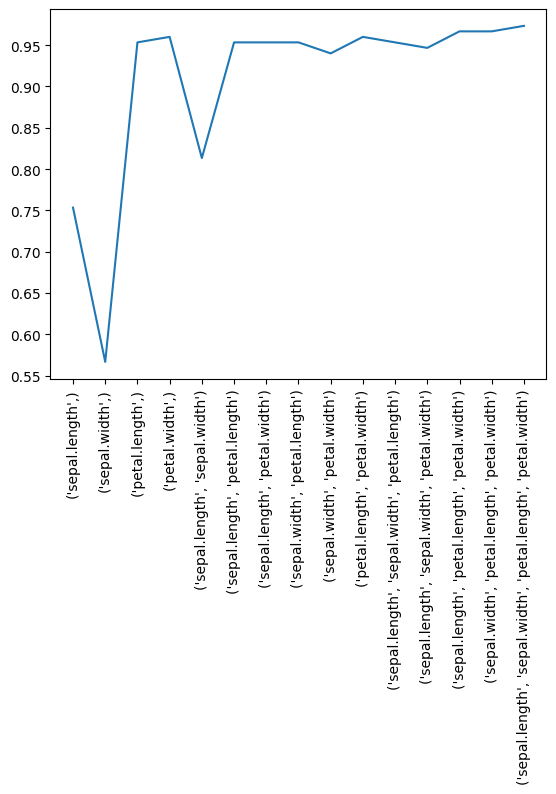

In [10]:
import matplotlib.pyplot as plt
plt.plot([str(names) for names in martric_df['feature_names']],martric_df['avg_score'])
plt.xticks(rotation = 90)
plt.show()

# Regression Example

In [3]:
dfh = pd.read_csv('BostonHousing.csv')
dfh.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(dfh.iloc[:,:-1],dfh.iloc[:,-1],test_size = 0.2,random_state = 2)

In [30]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
X_train.head()

(404, 13)
(102, 13)
(404,)
(102,)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87
37,0.08014,0.0,5.96,0,0.499,5.850,41.5,3.9342,5,279,19.2,396.90,8.77
286,0.01965,80.0,1.76,0,0.385,6.230,31.5,9.0892,1,241,18.2,341.60,12.93
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
25,0.84054,0.0,8.14,0,0.538,5.599,85.7,4.4546,4,307,21.0,303.42,16.51


In [5]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
columns = X_train.columns
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = pd.DataFrame(X_train,columns = columns)
X_test = pd.DataFrame(X_test,columns = columns)

In [33]:
import numpy as np
from sklearn.metrics import r2_score
model = LinearRegression()

print('Traning',np.mean(cross_val_score(model,X_train,y_train,cv = 5,scoring = 'r2')))
print('Testing',np.mean(cross_val_score(model,X_test,y_test,cv = 5,scoring = 'r2')))

Traning 0.7050401205374819
Testing 0.6881584642617279


In [40]:
lr = LinearRegression()
efs = EFS(lr,max_features = 13,scoring = 'r2',cv = 10, print_progress =True,n_jobs = -1)
sel = efs.fit(X_train,y_train)

Features: 8191/8191

In [92]:
sel.best_score_

np.float64(0.6908017709038575)

In [93]:
sel.best_feature_names_

('crim',
 'zn',
 'chas',
 'nox',
 'rm',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'b',
 'lstat')

In [94]:
metric_df = pd.DataFrame(sel.get_metric_dict()).T
metric_df.head()

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
0,"(0,)","[0.21114948846401937, 0.05617257789397889, 0.1...",0.090584,"(crim,)",0.058456,0.078706,0.026235
1,"(1,)","[0.10024498418931094, 0.057415019085727104, -0...",0.08041,"(zn,)",0.059363,0.079927,0.026642
2,"(2,)","[0.18401775043295243, 0.10274194717127505, 0.1...",0.18668,"(indus,)",0.084623,0.113938,0.037979
3,"(3,)","[0.07730135125361781, 0.035964826531153404, -0...",0.027614,"(chas,)",0.049668,0.066874,0.022291
4,"(4,)","[0.24448453708830642, 0.10867049515410976, 0.0...",0.139739,"(nox,)",0.096446,0.129856,0.043285


In [95]:
def adjust_r2(r2,row,col):
    return 1 - ((1-r2)*(row - 1))/(row-col-1)

In [96]:
metric_df['observations'] = X_train.shape[0]
metric_df['num_features'] = metric_df['feature_idx'].apply(lambda x:len(x))

In [97]:
metric_df['adjusted_r2'] = adjust_r2(metric_df['avg_score'],metric_df['observations'],metric_df['num_features'])
metric_df.sort_values('adjusted_r2',ascending = False)

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err,observations,num_features,adjusted_r2
8029,"(0, 3, 4, 5, 7, 8, 9, 10, 11, 12)","[0.6074602842383303, 0.8005826789942027, 0.647...",0.690479,"(crim, chas, nox, rm, dis, rad, tax, ptratio, ...",0.075194,0.101243,0.033748,404,10,0.682603
8150,"(0, 1, 3, 4, 5, 7, 8, 9, 10, 11, 12)","[0.6181802912059224, 0.8096041951792724, 0.652...",0.690802,"(crim, zn, chas, nox, rm, dis, rad, tax, ptrat...",0.078195,0.105283,0.035094,404,11,0.682125
8160,"(0, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12)","[0.6074758898705045, 0.7999812169543883, 0.648...",0.69011,"(crim, indus, chas, nox, rm, dis, rad, tax, pt...",0.075211,0.101265,0.033755,404,11,0.681414
8183,"(0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12)","[0.617975283389933, 0.8092438980436961, 0.6527...",0.690373,"(crim, zn, indus, chas, nox, rm, dis, rad, tax...",0.078243,0.105348,0.035116,404,12,0.680871
8164,"(0, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.6011462005712244, 0.8004653998340788, 0.647...",0.688572,"(crim, chas, nox, rm, age, dis, rad, tax, ptra...",0.075562,0.101738,0.033913,404,11,0.679833
...,...,...,...,...,...,...,...,...,...,...
0,"(0,)","[0.21114948846401937, 0.05617257789397889, 0.1...",0.090584,"(crim,)",0.058456,0.078706,0.026235,404,1,0.088321
1,"(1,)","[0.10024498418931094, 0.057415019085727104, -0...",0.08041,"(zn,)",0.059363,0.079927,0.026642,404,1,0.078122
30,"(1, 7)","[0.10039807747216667, 0.03616860718050863, -0....",0.070362,"(zn, dis)",0.061171,0.082361,0.027454,404,2,0.065726
7,"(7,)","[0.09784323368776848, -0.0634713321307947, -0....",0.027929,"(dis,)",0.068829,0.092673,0.030891,404,1,0.025511


In [98]:
sel.best_feature_names_

('crim',
 'zn',
 'chas',
 'nox',
 'rm',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'b',
 'lstat')

In [99]:
metric_df[metric_df['adjusted_r2'] == 0.6826032161818782]['feature_names'].values

array([('crim', 'chas', 'nox', 'rm', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat')],
      dtype=object)

In [100]:
X_train_sel = sel.transform(X_train)
X_test_sel = sel.transform(X_test)

In [101]:
model = LinearRegression()
print('Training',np.mean(cross_val_score(model,X_train_sel,y_train,cv=5,scoring = 'r2')))
print('Testing',np.mean(cross_val_score(model,X_test_sel,y_test,cv=5,scoring = 'r2')))

Training 0.7064800467817652
Testing 0.6801687887814347


# Sequential Backward/forward Elimination

In [33]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

dfh = pd.read_csv('BostonHousing.csv')
X_train,X_test,y_train,y_test = train_test_split(dfh.iloc[:,:-1],dfh.iloc[:,-1],test_size = 0.2,random_state = 2)

In [34]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


In [35]:
sc = StandardScaler()
columns = X_train.columns
X_train = pd.DataFrame(sc.fit_transform(X_train),columns = columns)
X_test = pd.DataFrame(sc.transform(X_test),columns = columns)
X_train.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,-0.377439,-0.474570,-0.583731,-0.278089,-0.538118,0.129286,-0.531579,0.351594,-0.518452,-0.725706,0.523591,0.453913,-0.834106
1,-0.389187,-0.474570,-0.789684,-0.278089,-0.485944,-0.621116,-0.992951,0.064463,-0.518452,-0.773226,0.331552,0.453913,-0.563408
2,-0.396192,3.166089,-1.398840,-0.278089,-1.477250,-0.079001,-1.353398,2.506174,-0.980569,-0.998945,-0.148545,-0.134420,0.029277
3,-0.395308,-0.474570,-0.628693,-0.278089,-0.746814,1.283420,-0.286475,0.553705,-0.865040,-0.993005,-0.340584,0.410612,-1.238728
4,-0.301127,-0.474570,-0.473503,-0.278089,-0.146813,-0.979197,0.600224,0.310955,-0.633981,-0.606906,1.195727,-0.540615,0.539329


In [36]:
model = LinearRegression()
print('Traning',np.mean(cross_val_score(model,X_train,y_train,cv = 5,scoring = 'r2')))
print('Testing',np.mean(cross_val_score(model,X_test,y_test,cv = 5,scoring = 'r2')))

Traning 0.7050401205374819
Testing 0.6881584642617279


In [37]:
lr = LinearRegression()

sfs = SFS(lr,k_features = 'best',forward = False, floating = False,scoring = 'r2',cv = 5)

sfs.fit(X_train,y_train)

c:\users\welcome\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\users\welcome\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\users\welcome\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\users\welcome\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(


SequentialFeatureSelector(estimator=LinearRegression(), forward=False,
                          k_features=(1, 13), scoring='r2')

In [38]:
sfs.k_score_

np.float64(0.7064800467817652)

In [39]:
sfs.k_feature_idx_

(0, 1, 3, 4, 5, 7, 8, 9, 10, 11, 12)

In [40]:
sfs.k_feature_names_

('crim',
 'zn',
 'chas',
 'nox',
 'rm',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'b',
 'lstat')

In [41]:
def adjusted_r2(r2,n,k):
    return 1- ((1-r2)*(n-1))/(n-1-k)

In [42]:
metric_df = pd.DataFrame(sfs.get_metric_dict()).T

metric_df['observations'] = X_train.shape[0]
metric_df['num_features'] = metric_df['feature_idx'].apply(lambda x:len(x))
metric_df['adjusted_r2'] = adjusted_r2(metric_df['avg_score'],metric_df['observations'],metric_df['num_features'])

metric_df.sort_values('adjusted_r2',ascending = False)

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err,observations,num_features,adjusted_r2
11,"(0, 1, 3, 4, 5, 7, 8, 9, 10, 11, 12)","[0.7412175937081458, 0.7151061039877977, 0.573...",0.70648,"(crim, zn, chas, nox, rm, dis, rad, tax, ptrat...",0.089991,0.070016,0.035008,404,11,0.698244
12,"(0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12)","[0.7407489962244721, 0.7151588113858585, 0.572...",0.706245,"(crim, zn, indus, chas, nox, rm, dis, rad, tax...",0.090302,0.070258,0.035129,404,12,0.69723
10,"(0, 3, 4, 5, 7, 8, 9, 10, 11, 12)","[0.7332217561791082, 0.7082579836450703, 0.575...",0.704533,"(crim, chas, nox, rm, dis, rad, tax, ptratio, ...",0.087209,0.067851,0.033926,404,10,0.697015
13,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.7411257145202398, 0.7157085282300134, 0.571...",0.70504,"(crim, zn, indus, chas, nox, rm, age, dis, rad...",0.090403,0.070337,0.035168,404,13,0.695208
9,"(3, 4, 5, 7, 8, 9, 10, 11, 12)","[0.7225293092511416, 0.7135135327376975, 0.584...",0.70096,"(chas, nox, rm, dis, rad, tax, ptratio, b, lstat)",0.07669,0.059667,0.029834,404,9,0.694129
8,"(3, 4, 5, 7, 8, 10, 11, 12)","[0.7136162055751394, 0.7103513247754767, 0.570...",0.695514,"(chas, nox, rm, dis, rad, ptratio, b, lstat)",0.082191,0.063947,0.031974,404,8,0.689347
7,"(3, 4, 5, 7, 10, 11, 12)","[0.707377961858809, 0.7021952442859837, 0.5601...",0.689103,"(chas, nox, rm, dis, ptratio, b, lstat)",0.085153,0.066252,0.033126,404,7,0.683607
6,"(3, 5, 7, 10, 11, 12)","[0.6878675577193645, 0.6867884323038764, 0.565...",0.68145,"(chas, rm, dis, ptratio, b, lstat)",0.080021,0.062259,0.031129,404,6,0.676636
5,"(5, 7, 10, 11, 12)","[0.6821339028381264, 0.6931087344856546, 0.560...",0.672946,"(rm, dis, ptratio, b, lstat)",0.075499,0.058741,0.029371,404,5,0.668837
4,"(5, 7, 10, 12)","[0.6639573070541646, 0.6745827090626906, 0.573...",0.658268,"(rm, dis, ptratio, lstat)",0.055791,0.043407,0.021704,404,4,0.654842


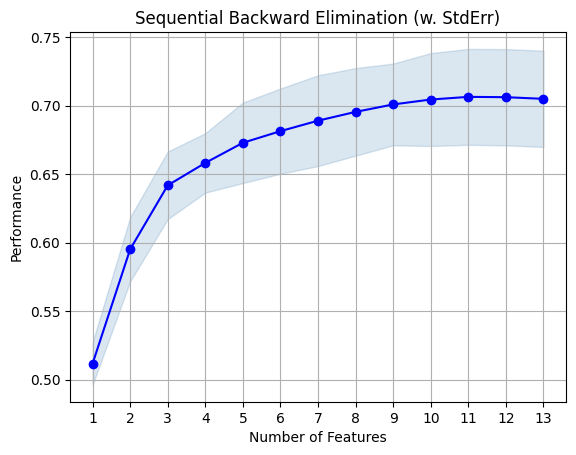

In [43]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
fig = plot_sfs(sfs.get_metric_dict(),kind = 'std_err')
plt.title('Sequential Backward Elimination (w. StdErr)')
plt.grid()
plt.show()

In [44]:
X_train_sel = sfs.transform(X_train) 
X_test_sel = sfs.transform(X_test)

model = LinearRegression()

print('Training',np.mean(cross_val_score(model,X_train_sel,y_train,cv = 5,scoring = 'r2')))
print('Testing',np.mean(cross_val_score(model,X_test_sel,y_test,cv = 5,scoring = 'r2')))

Training 0.7064800467817652
Testing 0.6801687887814347


In [45]:
X_train_sel.shape

(404, 11)

# Using Sklearn


In [71]:
from sklearn.feature_selection import SequentialFeatureSelector as SFS

sfs2 = SFS(model,n_features_to_select=10 ,direction = 'backward',n_jobs = -1,scoring = 'r2',cv = 5)

In [72]:
sfs2.fit(X_train,y_train)

SequentialFeatureSelector(direction='backward', estimator=LinearRegression(),
                          n_features_to_select=10, n_jobs=-1, scoring='r2')

In [73]:
X_train_sel = sfs2.transform(X_train)
X_test_sel = sfs2.transform(X_test)


In [74]:
model = LinearRegression()

print('Training',np.mean(cross_val_score(model,X_train_sel,y_train,cv = 5,scoring = 'r2')))
print('Testing',np.mean(cross_val_score(model,X_test_sel,y_test,cv = 5,scoring = 'r2')))

Training 0.70453279254179
Testing 0.6506256886070289


In [75]:
X_train_sel.shape

(404, 10)

In [78]:
sfs2.get_support()

array([ True, False, False,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True])